In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
RANDOM_SEED = 0x0

# TASK 1. Metrics (4 Points): 

First, we generate some sample data for a classification task.

In [4]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = make_blobs(n_samples=500, centers=4, random_state=RANDOM_SEED, cluster_std=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

Next, we apply a Logistic Regression Model and predict `y` values. 

In [5]:
log_reg = LogisticRegression(random_state=RANDOM_SEED).fit(X_train, y_train)
y_test_pred = log_reg.predict(X_test)

### Task 1a. Create and visualise the confusion matrix that describes the results:

Hint: use `seaborn.heatmap` and `sklearn.metrics.confusion_matrix` functions. Include the numbers of samples in each cell of the heatmap.

array([[14,  6,  6,  3],
       [ 5, 18,  2,  0],
       [ 3,  4, 21,  1],
       [ 0,  0,  1, 16]], dtype=int64)

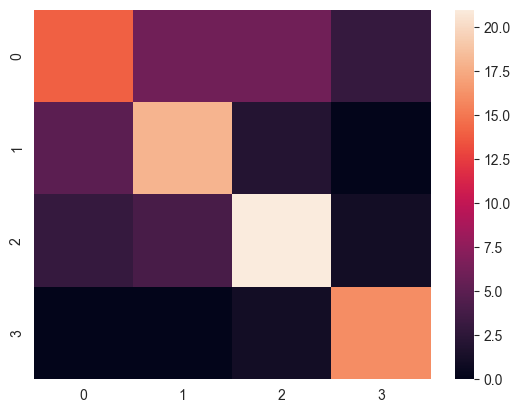

In [6]:
from sklearn import metrics

conf_mtx = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_mtx)
conf_mtx

### Task 1b. Create functions that calculate Precision, Recall and F1-Score. 
1. Don't use any ready solutions for this task, create your own functions based on formulas for the Precision, Recall and F1-Score. 
2. Apply them on the example above for the class `0`.

In [7]:
def precision(class_of_interest, confusion_matrix_test):
  tp = confusion_matrix_test[class_of_interest, class_of_interest]
  fp_array = confusion_matrix_test[:,class_of_interest]
  fp = sum(group
           for index, group in enumerate(fp_array)
           if index != class_of_interest)
  return tp / (tp + fp)

def recall(class_of_interest, confusion_matrix_test):
  tp = confusion_matrix_test[class_of_interest, class_of_interest]
  fn_array = confusion_matrix_test[class_of_interest,:]
  fn = sum(group
           for index, group in enumerate(fn_array)
           if index != class_of_interest)
  return tp / (tp + fn)

def f1_score(precision_value, recall_value):
  upper = precision_value * recall_value
  lower = precision_value + recall_value
  return 2 * (upper / lower)

In [8]:
precision_value = precision(0, conf_mtx)
recall_value = recall(0, conf_mtx)
f1_score_test = f1_score(precision_value, recall_value)

print(f"Precision: {precision_value}")
print(f"Recall: {recall_value}")
print(f"F1-Score: {f1_score_test}")

Precision: 0.6363636363636364
Recall: 0.4827586206896552
F1-Score: 0.5490196078431373


### Task 1c. Control your results 
Hint: you can use function `classification_report` of `sklearn.metrics`

In [9]:
from sklearn import metrics

report = metrics.classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.48      0.55        29
           1       0.64      0.72      0.68        25
           2       0.70      0.72      0.71        29
           3       0.80      0.94      0.86        17

    accuracy                           0.69       100
   macro avg       0.69      0.72      0.70       100
weighted avg       0.68      0.69      0.68       100



## 📢 **HAND-IN** 📢: Answer following question in Moodle:

F1-Score should not be used blindly on every occasion. The biggest problem of F1-Score is that it gives equal importance to precision and recall.

Give at least one **example** for each point:
- when should higher precision be prefered to higher recall?
- when should higher recall be prefered to higher precision?



# Try to explain in your own words (1-2 lines) how ShuffleSplit splits the data.
It shuffled the order of the data randomly and then splits it into the training and test data. It does not guarantee that the folds will be different, but it is very likely.

# TASK 2. Cross Validation and imbalanced dataset (5 points)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

sns.set() # just the theme

Before starting with the task, it's good to understand how different types of Cross Validation actually partition the data. Run the following code and inspect the graphs that show how the data was split for different runs. Full code source can be found [here](https://https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html)

In [11]:
from sklearn.model_selection import (
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    StratifiedShuffleSplit
)
from matplotlib.patches import Patch

# first, generate dummy data
n_points = 100
rng = np.random.RandomState(RANDOM_SEED)
X = rng.randn(100, 10)

# we have 10% of the data belonging to class 0, 30% - to class 1 and 60% to class 2
# first come all the data samples that belong to class 0, following by the samples of class 1 and then of class 2
percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ind] * int(100 * perc) for ind, perc in enumerate(percentiles_classes)]) 

# color settings for graphs
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

n_splits = 4

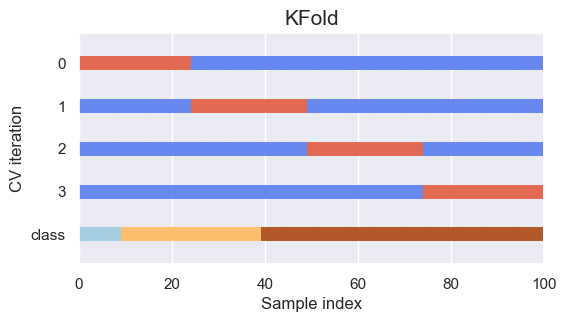

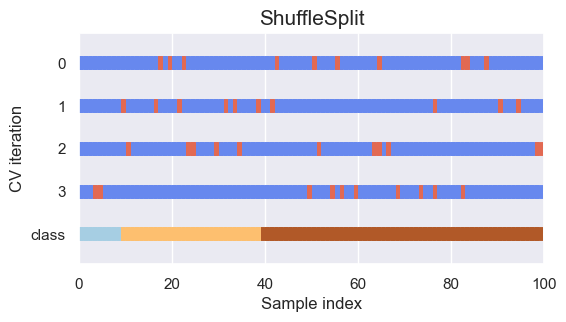

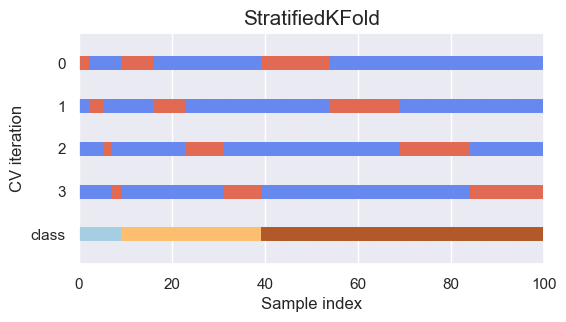

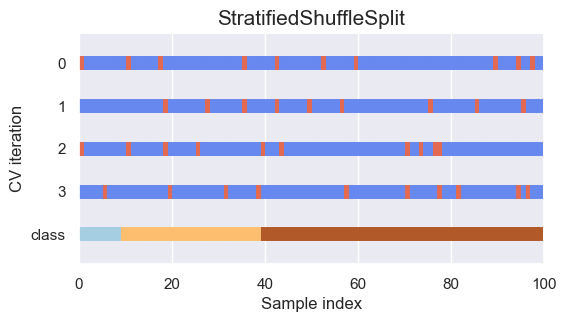

In [12]:
cvs = [KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit]

def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
      
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1.0
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )
    # Formatting
    yticklabels = list(range(n_splits)) + ["class"]
    ax.set(
        yticks=np.arange(n_splits + 1) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 1.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

for cv in cvs:
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(cv(n_splits), X, y, ax, n_splits)



### Dataset
In this task we are working with the **Default of Credit Card Clients Dataset**. This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. More info about the dataset can be found [here](https://https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset).

The target variable is:

- `default.payment.next.month`: Default payment (1=yes, 0=no)

In [13]:
# install datasets
!pip install datasets

First, we load and inspect the data.

In [14]:
from datasets import load_dataset

dataset = load_dataset("imodels/credit-card")
df_train = pd.DataFrame(dataset['train'])
X_train = df_train.drop(columns=['default.payment.next.month'])
y_train = df_train['default.payment.next.month'].values
print(X_train.head())

df_test = pd.DataFrame(dataset['test'])
X_test = df_test.drop(columns=['default.payment.next.month'])
y_test = df_test['default.payment.next.month'].values

Using custom data configuration imodels--credit-card-fc59432e6db31dca
Found cached dataset csv (C:/Users/jonas/.cache/huggingface/datasets/imodels___csv/imodels--credit-card-fc59432e6db31dca/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


  0%|          | 0/2 [00:00<?, ?it/s]

   limit_bal   age  pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
0    80000.0  24.0    0.0    0.0    0.0    0.0    0.0    0.0    75125.0   
1    30000.0  28.0    0.0    0.0    0.0    0.0    0.0    0.0    29242.0   
2   180000.0  44.0    0.0    0.0   -1.0   -1.0   -1.0   -1.0    20916.0   
3    60000.0  25.0    0.0    0.0    0.0    0.0    0.0    0.0    58839.0   
4   130000.0  25.0    0.0    0.0    0.0    0.0    0.0    0.0   111587.0   

   bill_amt2  ...  education:1  education:2  education:3  education:4  \
0    77353.0  ...          0.0          1.0          0.0          0.0   
1    29507.0  ...          0.0          1.0          0.0          0.0   
2        0.0  ...          0.0          0.0          0.0          0.0   
3    53235.0  ...          1.0          0.0          0.0          0.0   
4   112348.0  ...          0.0          1.0          0.0          0.0   

   education:5  education:6  marriage:0  marriage:1  marriage:2  marriage:3  
0          0.0          0.0     

Now, we want to make the dataset more imbalanced (for learning purposes).

In [15]:

def delete_random_samples(samples_X, samples_y, percentage=90):
  # find samples of class 1
  y1_indices = np.argwhere(samples_y==1)
  y1_indices = y1_indices.reshape((y1_indices.shape[0],))
  sampled_indices = np.random.choice(y1_indices, int(percentage/100*len(y1_indices)), replace=False)
  # delete randomly chosen samples of class 1
  new_samples_X = np.delete(samples_X.values, sampled_indices, axis=0)
  new_samples_y = np.delete(samples_y, sampled_indices)
  return new_samples_X, new_samples_y



### 2a. Inspect target variable and apply function that increases the imbalance of the dataset
1. Check how many samples of each class are presented in the dataset
2. Apply `delete_random_samples`
3. Check again how many samples of each class are presented in the dataset

In [16]:
print(X_train.shape)
print(y_train.shape)

X_train_notBalanced,y_train_notBalanced = delete_random_samples(X_train,y_train)
print(X_train_notBalanced.shape)
print(y_train_notBalanced.shape)

(24000, 33)
(24000,)
(19210, 33)
(19210,)


### 2b. Normalization the data
Apply Standardization to the data. You could either use the functions you created for the previous labs or `StandardScaler` of `sklearn` library.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_notBalanced)
X_train_standard = scaler.transform(X_train_notBalanced)
X_test_standard = scaler.transform(X_test)
print(X_train_standard.shape)
print(X_test_standard.shape)

(19210, 33)
(6000, 33)


C:\Users\jonas\Desktop\SEM5\MLDM\mldm_hs22\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### 2c. Logistic regression and Cross Validation
Apply Logistic regression and one of the Cross Validation techniques from the example above to the data in order to predict `default.payment.next.month`. You will have to:
1. Set `n_splits` to the number of splits that results in 20% of validation data in each split, set maximum iterations to `500` and random state to `RANDOM_SEED`.
2. Create and train the model
3. Apply the model in order to predict target variable of the test set. 
4. Calculate Accuracy, Precision (macro) and Recall (macro) for the predicted values.
5. Generate and visualize the confusion matrix of the test set. What do you see?


In [18]:
from sklearn.linear_model import LogisticRegressionCV

def logistic_regression_CV(n_splits, cv_technique, class_weight = None):
    cv = cv_technique(n_splits)
    clf = LogisticRegressionCV(cv=cv, random_state=RANDOM_SEED, class_weight=class_weight, max_iter=500).fit(X_train_standard, y_train_notBalanced)
    y_pred = clf.predict(X_test_standard)
    return y_pred

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def return_statistics(y_true, y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred,average='macro')
    recall = recall_score(y_true,y_pred,average='macro')

    print(f"Accuracy: {accuracy}")
    print(f"Precision (macro): {precision}")
    print(f"Recall (macro): {recall}")

    #visualise confusion matrix
    print(f"Confusion Matrix:")
    con_m = confusion_matrix(y_true, y_pred)

    print(con_m)
    sns.heatmap(con_m, annot=True, fmt="d")


Accuracy: 0.7811666666666667
Precision (macro): 0.39058333333333334
Recall (macro): 0.5
Confusion Matrix:
[[4687    0]
 [1313    0]]


C:\Users\jonas\Desktop\SEM5\MLDM\mldm_hs22\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


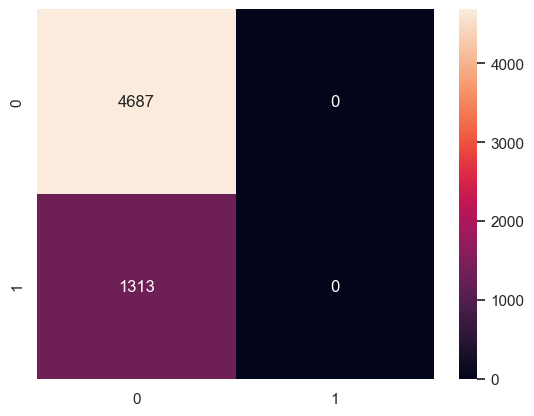

In [20]:

n_splits = 5

y_pred = logistic_regression_CV(n_splits, StratifiedKFold)
return_statistics(y_test, y_pred)

### 2d. Handling imbalanced dataset
1. Run the function `logistic_regression_CV` one more time. But this time add parameter `class_weight='balanced'` to the Logistic Regression Model. Adjust the function accordingly. 
2. Visualize the confusion matrix of the test set again. What changed?


Accuracy: 0.6746666666666666
Precision (macro): 0.6208754895319477
Recall (macro): 0.6689545437778912
Confusion Matrix:
[[3183 1504]
 [ 448  865]]


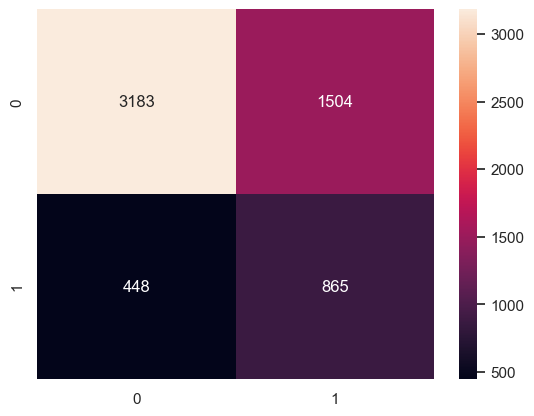

In [21]:
y_pred = logistic_regression_CV(n_splits=n_splits, cv_technique=StratifiedKFold, class_weight="balanced")
return_statistics(y_test, y_pred)

## 📢 **HAND-IN** 📢: Post both confusion matrices in Moodle and answer following question:

We saw how the parameter `class_weight` of `LogisticRegressionCV` set to `"balanced"` could "fix" our model. What are other options to deal with imbalanced datasets?


